In [1]:
pip install pandas_profiling

     |████████████████████████████████| 261 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.6 MB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 653 kB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 6.3 MB/s ta 0:00:01
     |████████████████████████████████| 3.1 MB 9.8 MB/s eta 0:00:01
     |████████████████████████████████| 812 kB 972 kB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=180558fb1609ba73adb2070e3e4da2aee4ad5b8d65f2b05a726b98b6c28d5469
  Stored in directory: /Users/nabilarizkanr/Library/Caches/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295198 sha256=b1cbd42792e643c9f813a18a44f1dc37c4cb1cec32343b7b8b448e0a18970ce8
  Stored in directory: /Users/nabilarizkanr/Library/Caches/pip/wheels/48/a1/7f/096c1269d6bf78d4768180602579b35a1e8cb1250bb4b40c74
Successfully buil

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pickle
%matplotlib inline

In [3]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

In [4]:
data.drop("sl_no", axis = 1, inplace = True)

In [5]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
print("The shape of data is (row, column) : " + str(data.shape))
print(data.info())

The shape of data is (row, column) : (215, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB
None


In [7]:
pip install flask

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
data['salary'].fillna(value = -0, inplace=True)
print('Salary column with null values : ', data['salary'].isnull().sum(), sep = '\n')

Salary column with null values : 
0


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


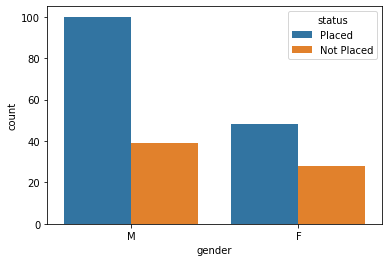

In [9]:
sns.countplot("gender", hue="status", data=data)
plt.show()

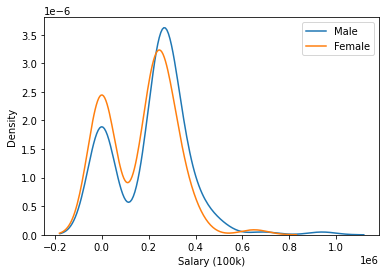

In [12]:
sns.kdeplot(data.salary[data.gender=="M"])
sns.kdeplot(data.salary[data.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


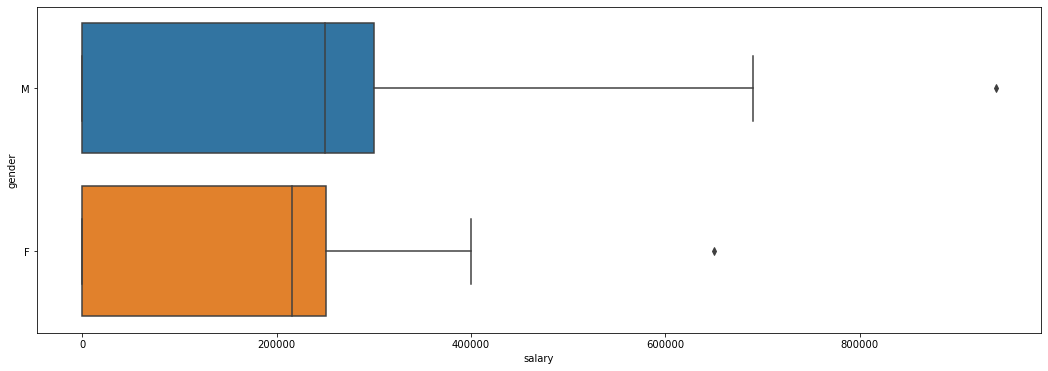

In [14]:
plt.figure(figsize=(18,6))
sns.boxplot("salary","gender", data=data)
plt.show()

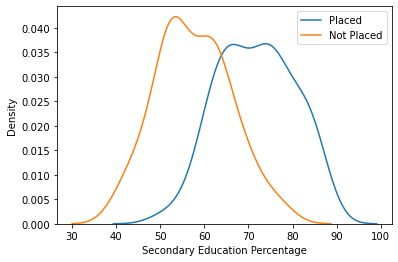

In [15]:
sns.kdeplot(data.ssc_p[data.status == "Placed"])
sns.kdeplot(data.ssc_p[data.status == "Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


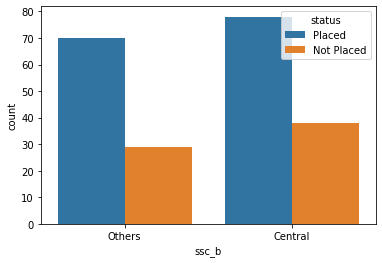

In [16]:
sns.countplot("ssc_b", hue="status", data=data)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


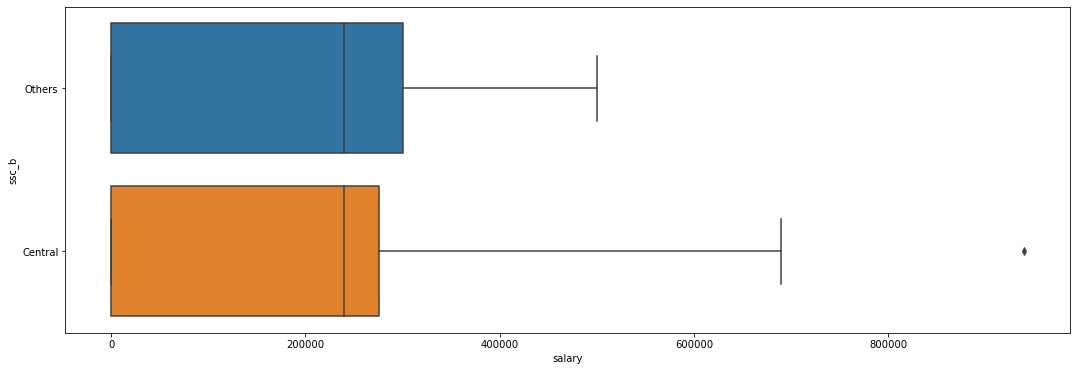

In [17]:
plt.figure(figsize=(18,6))
sns.boxplot("salary", "ssc_b", data=data)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


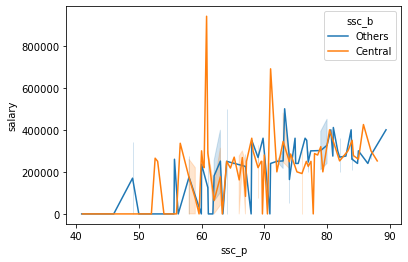

In [18]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=data)
plt.show()

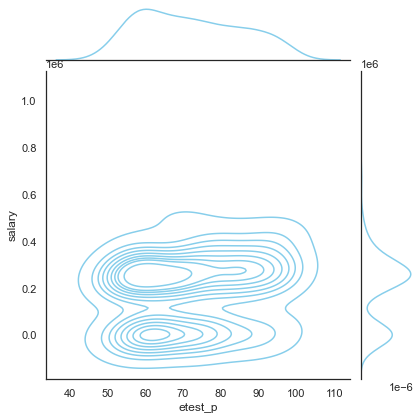

In [21]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=data["etest_p"], y=data["salary"], kind="kde",
            color = "skyblue")
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: module 'seaborn' has no attribute 'disptplot'

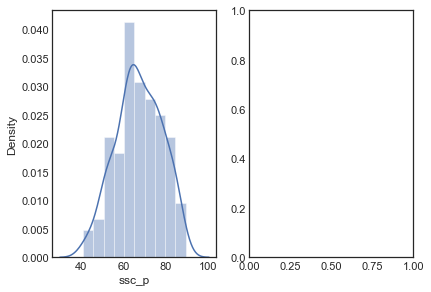

In [24]:
plt.figure(figsize=(15,7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(data['ssc_p'])
fig=plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.disptplot(data['hsc_p'])
fig=plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(data['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(data['etest_p'])
fig=plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(data['mba_p'])
fig=plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(data['salary'])
fig=plt.gcf()
fig.set_size_inches(10,10)

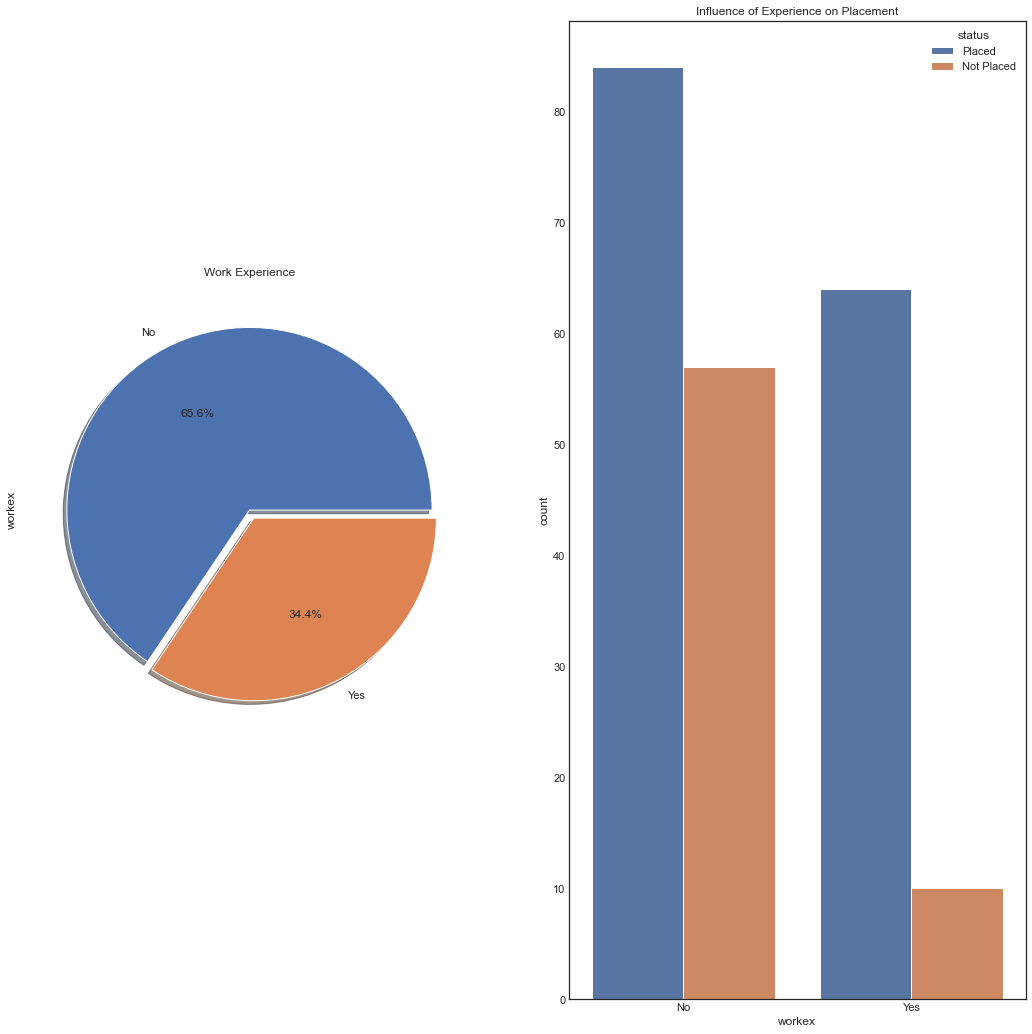

In [27]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,18))
data['workex'].value_counts().plot.pie(explode=[0,0.05],
                                        autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Work Experience')
sns.countplot(x='workex', hue="status", data=data)
ax[1].set_title("Influence of Experience on Placement")
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder
object_cols = ['gender', 'workex', 'specialisation','status']
label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [29]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [31]:
X = data[['ssc_p', 'hsc_p', 'degree_p', 'etest_p']]
y = data['status']

In [33]:
#Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [34]:
#Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score :  0.8307692307692308
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        20
           1       0.87      0.89      0.88        45

    accuracy                           0.83        65
   macro avg       0.80      0.79      0.80        65
weighted avg       0.83      0.83      0.83        65



In [35]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print("Accuracy Score : ", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score :  0.8615384615384616
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        20
           1       0.89      0.91      0.90        45

    accuracy                           0.86        65
   macro avg       0.84      0.83      0.84        65
weighted avg       0.86      0.86      0.86        65



In [37]:
#Logistic Regression 
LogR = LogisticRegression(solver='lbfgs')
LogR.fit(X_train, y_train)

y_pred = LogR.predict(X_test)

print("Accuracy Score : ", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score :  0.8461538461538461
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



In [38]:
pickle.dump(random_forest, open('model_classifier.pkl', 'wb'))

In [39]:
pip install flask

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
